<a href="https://colab.research.google.com/github/mrodriguezz23/UPSO_PythonAvanzado/blob/main/fotoapp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO 1**

In [ ]:
!pip install pillow
from PIL import Image,ImageFilter
import requests
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
from IPython.display import display

La imagen se redimensionó correctamente.


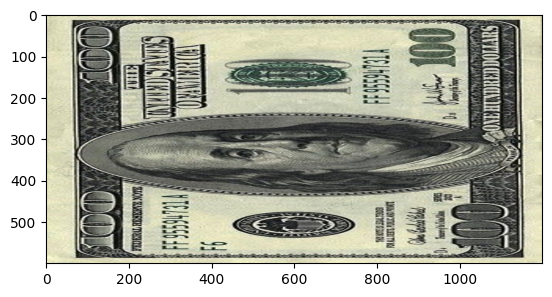

In [ ]:
def redimensionar_imagen(url_imagen, plataforma):
    # Dimensiones recomendadas para cada plataforma
    dimensiones = {
        "Youtube": (1280, 720),
        "Instagram": (1080, 1080),
        "Twitter": (1200, 600),
        "Facebook": (1200, 630)
    }

    # Verificamos si la plataforma es válida
    if plataforma not in dimensiones:
        raise ValueError("Plataforma no válida. Las opciones son: Youtube, Instagram, Twitter, Facebook")

    try:
        # Abrimos la imagen desde la ruta o URL
        if "http" in url_imagen:
            response = requests.get(url_imagen)
            imagen = Image.open(BytesIO(response.content))
        else:
            imagen = Image.open(url_imagen)

        # Redimensionamos la imagen
        nueva_dimension = dimensiones[plataforma]
        imagen_redimensionada = imagen.resize(nueva_dimension)

        return imagen_redimensionada

    except Exception as e:
        print(f"Error al procesar la imagen: {e}")

    return None  # Devolvemos None en caso de error


# USO
imagen_seleccionada = "dolar"
plataforma = "Twitter"
ruta_imagen = imagenes.get(imagen_seleccionada)
imagen_redimensionada = redimensionar_imagen(ruta_imagen, plataforma)

if imagen_redimensionada is not None:
    print("La imagen se redimensionó correctamente.")

    # Mostrar la imagen usando matplotlib
    plt.imshow(imagen_redimensionada)
    plt.show()

    # Aquí puedes realizar otras operaciones con la imagen redimensionada
else:
    print("Error al redimensionar la imagen.")

# **EJERCICIO 2**

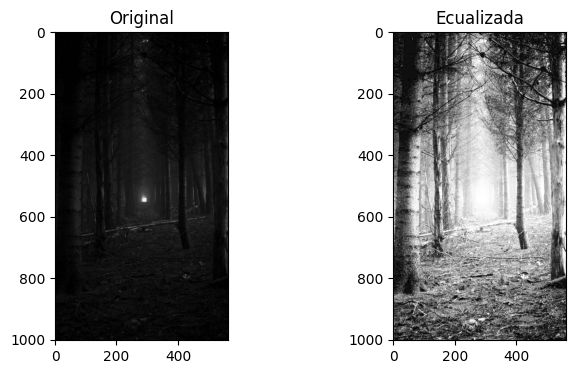

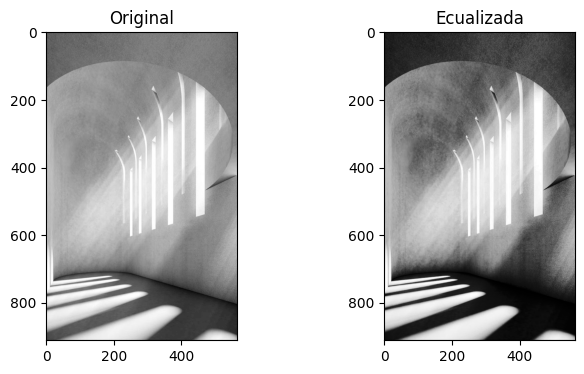

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def ecualizar_y_mostrar(imagen, nombre_guardar):
    try:
        # Convertimos la imagen a escala de grises si está en modo RGB
        if imagen.mode == 'RGB':
            imagen = imagen.convert('L')

        # Aplicamos la ecualización del histograma
        img_array = np.array(imagen)
        img_ecualizada = cv2.equalizeHist(img_array)

        # Mostramos las imágenes en una figura
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        ejes = axes.ravel()

        # Imagen original
        ejes[0].imshow(img_array, cmap='gray')
        ejes[0].set_title('Original')

        # Imagen ecualizada
        ejes[1].imshow(img_ecualizada, cmap='gray')
        ejes[1].set_title('Ecualizada')

        # Guardamos las imágenes
        cv2.imwrite(f'{nombre_guardar}_original.png', img_array)
        cv2.imwrite(f'{nombre_guardar}_ecualizada.png', img_ecualizada)

        # Mostramos la figura
        plt.show()

    except Exception as e:
        print(f"Error al procesar la imagen: {e}")

# Ejemplo de uso con imagen oscura
url_imagen_oscura = 'https://i.pinimg.com/564x/c0/de/a5/c0dea5db983d3069f32d6f308bcb35fe.jpg'
imagen_oscura = Image.open(BytesIO(requests.get(url_imagen_oscura).content))
ecualizar_y_mostrar(imagen_oscura, 'oscura')

# Ejemplo de uso con imagen con exceso de luz
url_imagen_luz = 'https://i.pinimg.com/564x/5f/c2/de/5fc2dea26db05d22f08e174f065de400.jpg'
imagen_luz = Image.open(BytesIO(requests.get(url_imagen_luz).content))
ecualizar_y_mostrar(imagen_luz, 'luz')

# **EJERCICIO 3**

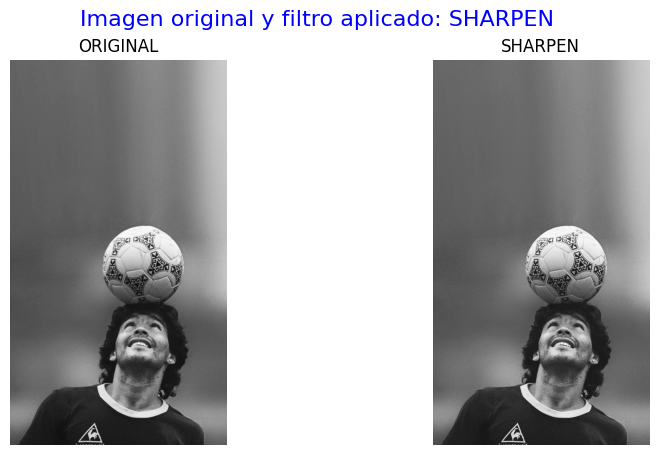

In [ ]:
from PIL import Image, ImageFilter
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def aplicar_filtro_a_imagen(url_imagen, nombre_filtro):
    try:
        # Descargamos la imagen desde la URL
        response = requests.get(url_imagen)
        imagen = Image.open(BytesIO(response.content))

        # Convertimos la imagen a escala de grises si está en modo RGB
        if imagen.mode == 'RGB':
            imagen = imagen.convert('L')

        # Obtenemos el filtro que queremos usar
        if nombre_filtro == "BLUR":
            imagen_procesada = imagen.filter(ImageFilter.BLUR)
        elif nombre_filtro == "CONTOUR":
            imagen_procesada = imagen.filter(ImageFilter.CONTOUR)
        elif nombre_filtro == "DETAIL":
            imagen_procesada = imagen.filter(ImageFilter.DETAIL)
        elif nombre_filtro == "EDGE_ENHANCE":
            imagen_procesada = imagen.filter(ImageFilter.EDGE_ENHANCE)
        elif nombre_filtro == "EDGE_ENHANCE_MORE":
            imagen_procesada = imagen.filter(ImageFilter.EDGE_ENHANCE_MORE)
        elif nombre_filtro == "EMBOSS":
            imagen_procesada = imagen.filter(ImageFilter.EMBOSS)
        elif nombre_filtro == "FIND_EDGES":
            imagen_procesada = imagen.filter(ImageFilter.FIND_EDGES)
        elif nombre_filtro == "SHARPEN":
            imagen_procesada = imagen.filter(ImageFilter.SHARPEN)
        elif nombre_filtro == "SMOOTH":
            imagen_procesada = imagen.filter(ImageFilter.SMOOTH)
        else:
            raise ValueError("Filtro no válido. Los filtros posibles son: BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SHARPEN, SMOOTH")

        # Mostramos las imágenes en una figura
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"Imagen original y filtro aplicado: {nombre_filtro}", fontsize=16, color='blue')

        # Imagen original
        axes[0].imshow(imagen, cmap='gray')
        axes[0].set_title("ORIGINAL")
        axes[0].axis('off')

        # Imagen con el filtro aplicado
        axes[1].imshow(imagen_procesada, cmap='gray')
        axes[1].set_title(nombre_filtro)
        axes[1].axis('off')

        # Guardamos la figura
        plt.savefig(f'{nombre_filtro}_filtro.png')

        # Mostramos la figura
        plt.show()

    except Exception as e:
        print(f"Error al procesar la imagen: {e}")

# Uso
aplicar_filtro_a_imagen('https://i.pinimg.com/originals/aa/62/d3/aa62d3bca0d73691089696f24cc37830.jpg', 'SHARPEN')

# **EJERCICIO 4**

1. Operador Laplaciano
2. Operador Canny
Seleccione el operador (1 o 2): 1
Ingrese el nombre para guardar la imagen procesada: leo.png


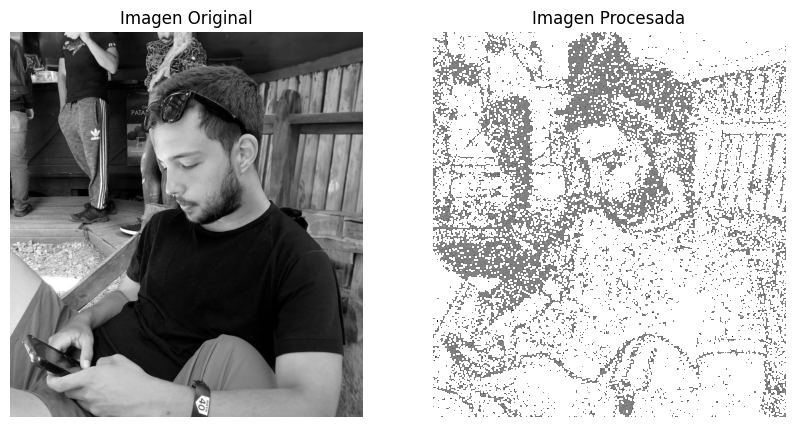

Imagen procesada guardada como "leo.png"


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

def aplicar_operador_a_imagen(img, operador, guardar_como):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if operador == "laplaciano":
        img_procesada = cv2.Laplacian(img_gris, cv2.CV_64F)
    elif operador == "canny":
        img_suavizada = cv2.GaussianBlur(img_gris, (5, 5), 0)
        img_procesada = cv2.Canny(img_suavizada, 50, 150)
    else:
        raise ValueError("Operador no válido. Los operadores posibles son: laplaciano, canny")

    img_invertida = cv2.bitwise_not(img_procesada)

    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(img_gris, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    axes[1].imshow(img_invertida, cmap='gray')
    axes[1].set_title('Imagen Procesada')
    axes[1].axis('off')
    plt.show()

    cv2.imwrite(guardar_como, img_invertida)
    print(f'Imagen procesada guardada como "{guardar_como}"')

def cargar_imagen_desde_enlace(url):
    response = requests.get(url)
    img_bytes = BytesIO(response.content)
    img = cv2.imdecode(np.frombuffer(img_bytes.read(), np.uint8), cv2.IMREAD_COLOR)
    return img

def ejecutar_proceso_de_imagen():
    # Cambiar la URL de la imagen según sea necesario
    url_imagen = 'https://i.imgur.com/REMNekv.png'
    img_original = cargar_imagen_desde_enlace(url_imagen)

    print('1. Operador Laplaciano')
    print('2. Operador Canny')
    opcion = int(input('Seleccione el operador (1 o 2): '))

    if opcion == 1:
        operador_seleccionado = "laplaciano"
    elif opcion == 2:
        operador_seleccionado = "canny"
    else:
        print('Opción no válida. Seleccionando operador Laplaciano por defecto.')
        operador_seleccionado = "laplaciano"

    guardar_como = input('Ingrese el nombre para guardar la imagen procesada: ')

    aplicar_operador_a_imagen(img_original, operador_seleccionado, guardar_como)

ejecutar_proceso_de_imagen()


# **EJERCICIO 5**


Menú de opciones:
1. Redimensionar imagen
2. Ecualizar imagen
3. Aplicar filtro
4. Aplicar operador a imagen
5. Ingresar imagen diferente
6. Salir
Seleccione una opción (1-6): 1
Ingrese el URL de la imagen: https://static.wikia.nocookie.net/deportes/images/4/4d/Lionel_Messi_1.jpg/revision/latest/thumbnail/width/360/height/360?cb=20191211025232&path-prefix=es
Ingrese la plataforma (Youtube, Instagram, Twitter, Facebook): Twitter


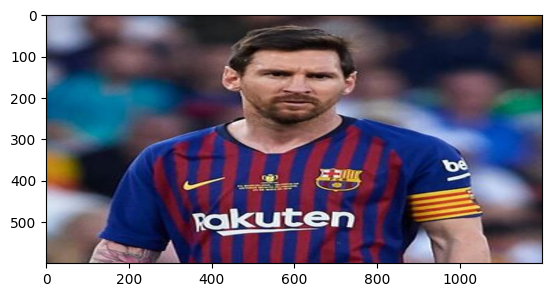


Menú de opciones:
1. Redimensionar imagen
2. Ecualizar imagen
3. Aplicar filtro
4. Aplicar operador a imagen
5. Ingresar imagen diferente
6. Salir


In [ ]:
def menu():
    redimensioned_image = None
    ruta_imagen = None

    while True:
        print("\nMenú de opciones:")
        print("1. Redimensionar imagen")
        print("2. Ecualizar imagen")
        print("3. Aplicar filtro")
        print("4. Aplicar operador a imagen")
        print("5. Ingresar imagen diferente")
        print("6. Salir")

        opcion = input("Seleccione una opción (1-6): ")

        if opcion == '1':
            if redimensioned_image is None:
                ruta_imagen = input("Ingrese el URL de la imagen: ")
            plataforma = input("Ingrese la plataforma (Youtube, Instagram, Twitter, Facebook): ")
            redimensioned_image = redimensionar_imagen(ruta_imagen, plataforma)
            plt.imshow(redimensioned_image)
            plt.show()

        elif opcion == '2':
            if redimensioned_image is not None:
                nombre_guardar = input("Ingrese un nombre para guardar la imagen ecualizada: ")
                ecualizar_y_mostrar(redimensioned_image, nombre_guardar)
                respuesta = input("¿Deseas seguir aplicando funciones? (s/n): ")
                if respuesta.lower() != 's':
                    break
            else:
                print("Error: Debes redimensionar una imagen primero.")

        elif opcion == '3':
            if redimensioned_image is not None:
                nombre_filtro = input("Ingrese el nombre del filtro (BLUR, CONTOUR, DETAIL, ...): ")
                aplicar_filtro_desde_url(redimensioned_image, nombre_filtro)
                respuesta = input("¿Deseas seguir aplicando funciones? (s/n): ")
                if respuesta.lower() != 's':
                    break
            else:
                print("Error: Debes redimensionar una imagen primero.")

        elif opcion == '4':
            if redimensioned_image is not None:
                ejecutar_proceso_de_imagen()
                respuesta = input("¿Deseas seguir aplicando funciones? (s/n): ")
                if respuesta.lower() != 's':
                    break
            else:
                print("Error: Debes redimensionar una imagen primero.")

        elif opcion == '5':
            ruta_imagen = input("Ingrese la ruta de la imagen: ")
            redimensioned_image = None

        elif opcion == '6':
            print("Saliendo del programa.")
            break

        else:
            print("Opción no válida. Intente nuevamente.")

if __name__ == "__main__":
    try:
        menu()
    except Exception as e:
        print(f"Error en el programa: {e}")
